# Neural Nets.

## Import required packages.

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor 
from sklearn.preprocessing import StandardScaler

from mord import LogisticIT

from dmba import classificationSummary, regressionSummary

%matplotlib inline
import matplotlib.pylab as plt

## Neural network for Tiny data set. 

In [2]:
# Create data frame for Tiny data set.
tiny_df = pd.read_csv('TinyData.csv')

# Display the 6 records of tiny_df data frame.
print(tiny_df.head(6))

# Identify variable types.
tiny_df.dtypes

   Obs.  Fat  Salt Acceptance
0     1  0.2   0.9       like
1     2  0.1   0.1    dislike
2     3  0.2   0.4    dislike
3     4  0.2   0.5    dislike
4     5  0.4   0.5       like
5     6  0.3   0.8       like


Obs.            int64
Fat           float64
Salt          float64
Acceptance     object
dtype: object

In [3]:
# Apply 'Fat' and 'Salt' as predictors and 'Acceptance' 
# as outcome for neural network model.
predictors = ['Fat', 'Salt']
outcome = 'Acceptance'

# Create predictor X and outcome y variables.   
X = tiny_df[predictors]
y = tiny_df[outcome]

# Sort and display outcome classes in ascending order.
classes = sorted(y.unique())
print('Outcome Classes Sorted in Ascending Order')
print(classes)


Outcome Classes Sorted in Ascending Order
['dislike', 'like']


In [4]:
# Use MLPCclassifier() function for nerual network model.
# Apply a default single hidden layer with 3 nodes, 'logistic' 
# activation function, and solver = 'lbfgs', which is
# applied for small data sets for better performance 
# and fast convergence. For large data sets, apply default 
# solver = 'adam'. 
tiny_clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', 
                    solver='lbfgs', random_state=1)
tiny_clf.fit(X, y)

# Make predictions using neural network model for 
# Tiny data set.
tiny_clf.predict(X)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Tiny Neural Network Model')
print(tiny_clf.intercepts_)

print()
print('Network Weights for Tiny Neural Network Model')
print(tiny_clf.coefs_)


Final Intercepts for Tiny Neural Network Model
[array([0.13368045, 4.07247552, 7.00768104]), array([14.30748676])]

Network Weights for Tiny Neural Network Model
[array([[ -1.30656481,  -4.20427792, -13.29587332],
       [ -0.04399727,  -4.91606924,  -6.03356987]]), array([[ -0.27348313],
       [ -9.01211573],
       [-17.63504694]])]


In [5]:
# Display Tiny data set and predictions for each record.
print()
print('Tiny Data Set and Predictions Using Neural Network Model')
print(pd.concat([
    tiny_df,
    pd.DataFrame(tiny_clf.predict_proba(X), columns=classes)
], axis=1))


Tiny Data Set and Predictions Using Neural Network Model
   Obs.  Fat  Salt Acceptance   dislike      like
0     1  0.2   0.9       like  0.000490  0.999510
1     2  0.1   0.1    dislike  0.999994  0.000006
2     3  0.2   0.4    dislike  0.999741  0.000259
3     4  0.2   0.5    dislike  0.997368  0.002632
4     5  0.4   0.5       like  0.002133  0.997867
5     6  0.3   0.8       like  0.000075  0.999925


In [6]:
# Confusion matrix for Tiny neural network model. 

# Identify  and display confusion matrix for Tiny predictions
# using neural network model. 
print('Confusion Matrix for Tiny Neural Network Model')
classificationSummary(y, tiny_clf.predict(X), class_names=classes)

Confusion Matrix for Tiny Neural Network Model
Confusion Matrix (Accuracy 1.0000)

        Prediction
 Actual dislike    like
dislike       3       0
   like       0       3


## Neural network model for car accidents severity. 

In [7]:
# Upload the Accidents (accidentsnn.csv) data set and do 
# data cleaning and preprocessing. 

# Create data frame for Accidents data set.
accident_df = pd.read_csv('accidentsnn.csv')
print(accident_df.shape)
# The data set has 999 records and 5 columns.

# Display the first 10 records of accident_df data frame.
print('First 10 Records of Accidents Data Set')
print(accident_df.head(10))

# Identify and display variable types.
print()
print('Variable Type for Accident Data Set')
print(accident_df.dtypes)

# To remove for SUR_COND (surface condition) the unknown = 9,
# convert SUR_COND into categorical variable. 
accident_df.SUR_COND = accident_df.SUR_COND.astype('category')

# Convert the categorical data into dummy variables
# exclude the column for SUR_COND_9 (unknown = 9).
accident_upd = pd.get_dummies(accident_df, 
            columns=['SUR_COND']).drop(columns=['SUR_COND_9'])

# Display the first 10 records of the updated Accidents 
# data frame, accidents_upd.
print()
print('First 10 Records of Updated Accidents Data Set')
print(accident_upd.head(10))

(999, 5)
First 10 Records of Accidents Data Set
   ALCHL_I  PROFIL_I_R  SUR_COND  VEH_INVL  MAX_SEV_IR
0        2           0         1         1           0
1        2           1         1         1           2
2        1           0         1         1           0
3        2           0         2         2           1
4        2           1         1         2           1
5        2           0         1         1           0
6        2           0         2         1           2
7        2           1         2         1           1
8        2           1         1         1           1
9        2           0         1         1           0

Variable Type for Accident Data Set
ALCHL_I       int64
PROFIL_I_R    int64
SUR_COND      int64
VEH_INVL      int64
MAX_SEV_IR    int64
dtype: object

First 10 Records of Updated Accidents Data Set
   ALCHL_I  PROFIL_I_R  VEH_INVL  MAX_SEV_IR  SUR_COND_1  SUR_COND_2  \
0        2           0         1           0           1           0   
1   

In [8]:
# Create Accidents outcome and predictors to run neural network
# model.
outcome = 'MAX_SEV_IR'
predictors = [c for c in accident_upd.columns if c != outcome]

# Create predictors and outcome variables.  
X = accident_upd[predictors]
y = accident_upd[outcome]

# Partition data into training (60% or 0.6) and validation(40% or 0.4)
# of the accident_upd data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Use MLPCclassifier() function to train neural network model.
# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (7); 
# (b) single hidden layer with 3 nodes (default is 2); 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (3);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
accident_clf = MLPClassifier(hidden_layer_sizes=(3), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
accident_clf.fit(train_X, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Accidents Neural Network Model')
print(accident_clf.intercepts_)

print()
print('Network Weights for Accidents Neural Network Model')
print(accident_clf.coefs_)

Final Intercepts for Accidents Neural Network Model
[array([-2.10410195, -1.22860899,  2.15191685]), array([-6.69504242,  4.57429369,  2.16758111])]

Network Weights for Accidents Neural Network Model
[array([[ 3.84425076, -2.66588082, -1.33746346],
       [-7.24621073, -0.82765019, -7.00965479],
       [-4.39420108, -2.09433738,  0.15446075],
       [ 4.25738797,  1.20409705,  5.24115923],
       [-2.55121097, -1.79778896, -3.85451348],
       [-0.38657878, -0.17167315, -1.93980547],
       [-6.85899428, -0.60168751, -2.32883437]]), array([[ 9.22173258, -7.05858024, -1.75295541],
       [ 0.31080214, -0.76514448, -0.02144678],
       [ 3.65911791, -6.24133596,  2.55611586]])]


In [9]:
# Make accident severity classification for validation set 
# using Accidents neural network model. 

# Use accident_clf model to classify accident severity
# for validation set.
accident_pred = accident_clf.predict(valid_X)

# Predict accident severity probabilities p(0), p(1),
# and p(2) for validation set.
accident_pred_prob = np.round(accident_clf.predict_proba(valid_X), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
accident_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in accident_pred_prob],
                'p(1)': [p[1] for p in accident_pred_prob],
                'p(2)': [p[2] for p in accident_pred_prob],
                'Classification': accident_pred})

print('Classification for Accidents Data for Validation Partition')
print(accident_pred_result.head(10))

Classification for Accidents Data for Validation Partition
     Actual    p(0)    p(1)    p(2)  Classification
507       2  0.0000  0.8713  0.1287               1
608       2  0.5915  0.0000  0.4085               0
452       1  0.0003  0.7677  0.2320               1
368       1  0.0000  0.9033  0.0967               1
242       1  0.0003  0.7677  0.2320               1
928       0  0.9593  0.0000  0.0407               0
262       0  0.9593  0.0000  0.0407               0
809       0  0.9593  0.0000  0.0407               0
318       2  0.0004  0.0017  0.9978               2
49        1  0.0001  0.4150  0.5848               2


In [10]:
# Confusion matrices for Accidents neural network model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, accident_clf.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, accident_clf.predict(valid_X))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8715)

       Prediction
Actual   0   1   2
     0 332   0   0
     1   0 172   8
     2  31  38  18

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8650)

       Prediction
Actual   0   1   2
     0 218   0   1
     1   0 115   4
     2  24  25  13


In [11]:
# Develop and display ordinal logistic model for Accidents 
# data set.

# Transfer Numpy int into just int ro run LogisticIT function.
np.int = int

# Utilize LogisticIT() function from mord library to 
# develop ordinal logistic regression. alpha = 0 
# means no regularizaiton in this function. 
logit = LogisticIT(alpha=0)
logit.fit(train_X, train_y)

# Identify and display confusion matrix for training partition. 
print('Training Partition for Ordinal Logistic Model')
classificationSummary(train_y, logit.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Ordinal Logistic Model')
classificationSummary(valid_y, logit.predict(valid_X))

Training Partition for Ordinal Logistic Model
Confusion Matrix (Accuracy 0.7679)

       Prediction
Actual   0   1   2
     0 331   1   0
     1  13 117  50
     2  35  40  12

Validation Partition for Ordinal Logistic Model
Confusion Matrix (Accuracy 0.7625)

       Prediction
Actual   0   1   2
     0 219   0   0
     1  19  78  22
     2  29  25   8


In [12]:
# Make classification for new Accidents data using 
# neural network model. 

# Consider dataframe new_data with 3 new records, for 
# which classification of accidents severity is required. 
# Notice that the 'MAX_SEV_IR' outcome variable is 
# not present in these records.
new_data = pd.DataFrame({
        'ALCHL_I': [2,1,2],  
        'PROFIL_I_R': [1,1,0],
        'VEH_INVL': [1, 1, 2],
        'SUR_COND_1': [1, 0, 0],  
        'SUR_COND_2': [0, 0, 0],
        'SUR_COND_3': [0, 1, 0],  
        'SUR_COND_4': [0, 0, 0],         
})

# Make classifications for new Accidents data.
accident_pred_new = accident_clf.predict(new_data)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
accidents_prob_new = np.round(accident_clf.predict_proba(new_data), 
                      decimals=4)

# Display new data and classifications for new data.
pred_accident_result_new = pd.DataFrame({
            'ALCHL_I': [2,1,2],  
            'PROFIL_I_R': [1,1,0],
            'VEH_INVL': [1, 1, 2],
            'SUR_COND_1': [1, 0, 0],  
            'SUR_COND_2': [0, 0, 0],
            'SUR_COND_3': [0, 1, 0],  
            'SUR_COND_4': [0, 0, 0],
            'p(0)': [p[0] for p in accidents_prob_new],
            'p(1)': [p[1] for p in accidents_prob_new],
            'p(2)': [p[2] for p in accidents_prob_new],
            'Classification': accident_pred_new
})
print()
print('Classification for Accidents Using New Data')
print(pred_accident_result_new)


Classification for Accidents Using New Data
   ALCHL_I  PROFIL_I_R  VEH_INVL  SUR_COND_1  SUR_COND_2  SUR_COND_3  \
0        2           1         1           1           0           0   
1        1           1         1           0           0           1   
2        2           0         2           0           0           0   

   SUR_COND_4    p(0)    p(1)    p(2)  Classification  
0           0  0.0002  0.6734  0.3263               1  
1           0  0.0000  0.9170  0.0830               1  
2           0  0.0003  0.1505  0.8492               2  


## Grid search for Accidents data set.

In [13]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

Best score:0.8664
Best parameter:  {'hidden_layer_sizes': 10}


In [14]:
# Use MLPCclassifier() function to train the improved neural network model
# based on grid search results. 

# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (7); 
# (b) single hidden layer with 10 nodes based on grid search; 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (3);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
#     For large data sets, apply default solver = 'adam'. 
accident_clf_imp = MLPClassifier(hidden_layer_sizes=(10), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
accident_clf_imp.fit(train_X, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Accidents Neural Network Model')
print(accident_clf_imp.intercepts_)

print()
print('Network Weights for Accidents Neural Network Model')
print(accident_clf_imp.coefs_)

Final Intercepts for Accidents Neural Network Model
[array([-3.84978959, -4.517135  ,  7.97136262,  1.29224263,  2.02724975,
       -2.79618305, -2.35900296,  3.45674492, -1.78690143, 10.9659219 ]), array([-7.93350289, -0.90979657,  8.64096386])]

Network Weights for Accidents Neural Network Model
[array([[ -4.80731064,   5.43160065,  -8.11385339,   0.3772313 ,
         -0.86481035,  -2.46740873,  -1.00359241,  -3.90222483,
          7.70399154,  -2.85119534],
       [ -1.17057259,   1.74077849,   6.28994209,  -7.21757244,
         -7.41680207,  16.7366824 ,   4.70584155,  -6.00522714,
        -17.52062432, -15.17237443],
       [-11.49879198, -12.28451277,  -1.06056565,  -6.14252531,
          0.28076509,   4.66713232,   4.5815072 ,  -6.71513573,
         -8.01286798,  -9.8440572 ],
       [  0.9382791 ,   1.33374401, -14.22397796,   9.80716794,
          3.9186763 , -11.33103102,  -6.83522534,   0.19409907,
          4.49311074,   9.20279464],
       [ -3.76927114,  -2.25135046, -13.

In [15]:
# Confusion matrices for improved neural network model for Accidents
# using grid search results. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, accident_clf_imp.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, accident_clf_imp.predict(valid_X))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8781)

       Prediction
Actual   0   1   2
     0 332   0   0
     1   0 172   8
     2  31  34  22

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8725)

       Prediction
Actual   0   1   2
     0 218   0   1
     1   0 114   5
     2  24  21  17


In [16]:
# For each hidden_layer_size, display grid search results including
# mean and standard deviation of the score. 
display=['param_hidden_layer_sizes', 'mean_test_score', 'std_test_score']
print(pd.DataFrame(gridSearch.cv_results_)[display])

   param_hidden_layer_sizes  mean_test_score  std_test_score
0                         2         0.554258        0.003731
1                         3         0.864762        0.009892
2                         4         0.858067        0.009617
3                         5         0.863095        0.011419
4                         6         0.859748        0.008483
5                         7         0.554258        0.003731
6                         8         0.854762        0.003912
7                         9         0.853081        0.008611
8                        10         0.866415        0.012147
9                        11         0.851401        0.008501
10                       12         0.851401        0.013542
11                       13         0.858081        0.010750
12                       14         0.853067        0.007137
13                       15         0.854748        0.006872
14                       16         0.858081        0.007747
15                      

<Axes: xlabel='param_hidden_layer_sizes'>

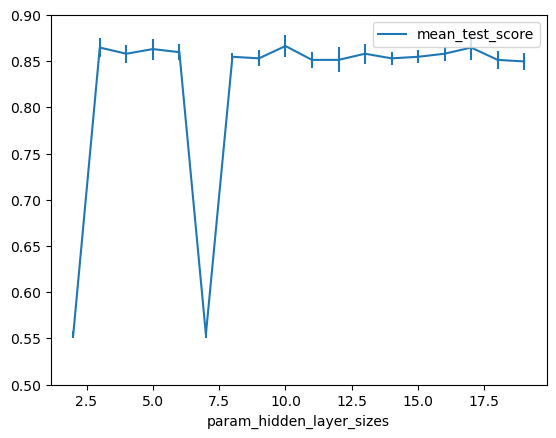

In [17]:
# Develop a plot that demostrates mean_test_score and std_test_score.
pd.DataFrame(gridSearch.cv_results_)[display].plot(x='param_hidden_layer_sizes', 
                    y='mean_test_score', yerr='std_test_score', ylim=(0.5, 0.9))

# Neural network model for Toyota Corrola data set.

In [18]:
# Create data frame for Toyota Corolla data set with 1000 top records.
corolla_df = pd.read_csv('ToyotaCorolla.csv').iloc[:1000,:]

# Display column names of ToyotaCorolla data frame.
print(corolla_df.columns)

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')


In [19]:
# Change column names, identify predictors and outcome, 
# and data preprocessing.

# Shorten some column names. 
corolla_df = corolla_df.rename(columns={'Age_08_04': 'Age', 
                   'Quarterly_Tax': 'Tax', 'Met_Color': 'Metalic',
                                    'Fuel_Type': 'Fuel'})


# Identify predictors (same as those in linear regression and 
# regression tree) and outcome for neural network model. 
predictors = ['Age', 'KM', 'Fuel', 'HP', 'Metalic', 'Automatic', 'CC', 
              'Doors', 'Tax', 'Weight']
outcome = 'Price'

# Name predictors and outcome data frames as X and y, respectively. 
# Convert, if necessary, categorical variables to dummy variables. 
X = pd.get_dummies(corolla_df[predictors], drop_first=True)
y = corolla_df[outcome]

# Display the first 10 records of Toyota Corolla data set. 
corolla_df_reg = pd.concat([y, X], axis=1)
print('First 10 Records of Toyota Corolla Data Set')
print(corolla_df_reg.head(10))

First 10 Records of Toyota Corolla Data Set
   Price  Age     KM   HP  Metalic  Automatic    CC  Doors  Tax  Weight  \
0  13500   23  46986   90        1          0  2000      3  210    1165   
1  13750   23  72937   90        1          0  2000      3  210    1165   
2  13950   24  41711   90        1          0  2000      3  210    1165   
3  14950   26  48000   90        0          0  2000      3  210    1165   
4  13750   30  38500   90        0          0  2000      3  210    1170   
5  12950   32  61000   90        0          0  2000      3  210    1170   
6  16900   27  94612   90        1          0  2000      3  210    1245   
7  18600   30  75889   90        1          0  2000      3  210    1245   
8  21500   27  19700  192        0          0  1800      3  100    1185   
9  12950   23  71138   69        0          0  1900      3  185    1105   

   Fuel_Diesel  Fuel_Petrol  
0            1            0  
1            1            0  
2            1            0  
3         

In [20]:
# Create data partitioning and scale the data using 
# StandardScaler()from scikit-learn libray. Display 
# original and scaled predictors for training partition. 

# Create data partition with training set, 60%(0.6), and 
# validation set 40%(0.4) of the Toyota Corolla data set.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Display the first 10 records of Toyota Corolla training 
# partition's predictors. 
print('Predictors for Training Partition')
print(train_X.head(10))

# Scale input data (predictors) for training  and validation 
# partitions using StandardScaler().
sc_X = StandardScaler()
train_X_sc = sc_X.fit_transform(train_X)
valid_X_sc = sc_X.transform(valid_X)

# Develop a data frame to display scaled predictors for 
# training partition. Round scaled values to 3 decimals.
# Add coloumn titles to data frame.
train_X_sc_df = np.round(pd.DataFrame(train_X_sc), decimals=3)                            
train_X_sc_df.columns=['Age', 'KM', 'HP', 'Metalic', 
                       'Automatic', 'CC', 'Doors', 'Tax', 'Weight', 
                        'Fuel_Diesel',  'Fuel_Petrol']

# Display scaled predictors for training partition.
print()
print('Scaled Predictors for Training Partition')
print(train_X_sc_df.head(10))

Predictors for Training Partition
     Age      KM   HP  Metalic  Automatic    CC  Doors  Tax  Weight  \
371   35   18000  110        1          0  1600      5   85    1075   
45    23   84000   90        0          0  2000      5  234    1270   
560   54   39291  110        1          0  1600      3   69    1040   
748   61   81170  110        1          0  1600      4   69    1040   
419   55   94122   86        1          0  1300      3   69    1015   
604   68  204250   72        0          0  2000      3  185    1115   
725   65   87821   86        1          0  1300      3   69    1015   
11    22   43610  192        0          0  1800      3  100    1185   
214   33   78108   90        1          0  2000      3  210    1170   
344   33   28715  110        1          0  1600      5   85    1075   

     Fuel_Diesel  Fuel_Petrol  
371            0            1  
45             1            0  
560            0            1  
748            0            1  
419            0        

In [21]:
# Use MLPRegressor() function to train neural network model.
# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (11); 
# (b) default single hidden layer with 9 nodes; 
# (c) default output layer with one outcome variable (Price);
# (d) optimization function solver = 'lbfgs', 
#     which is applied for small data sets for better 
#     performance and fast convergence. For large data sets, 
#     apply default solver = 'adam' optimization function;
# (e) model is fit with scaled predictors and regular outcome
#     in training partition.
corolla_reg = MLPRegressor(hidden_layer_sizes=(9), 
                solver='lbfgs', max_iter=10000, random_state=1)
corolla_reg.fit(train_X_sc, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Toyota Corolla Neural Network Model')
print(corolla_reg.intercepts_)

print()
print('Network Weights for Toyota Corolla Neural Network Model')
print(corolla_reg.coefs_)


Final Intercepts for Toyota Corolla Neural Network Model
[array([ 31.98131488,  33.96950299, -47.43171931, -89.96896289,
       -17.15045524,  41.46287042, -15.05268064,   3.52803376,
        51.44503159]), array([90.22978456])]

Network Weights for Toyota Corolla Neural Network Model
[array([[ 3.22875409e+00,  1.62963374e+01, -1.02809327e+01,
         2.22647028e+01, -4.73022291e+01, -2.56713500e-01,
         1.55100298e+01, -4.25056388e+00, -3.22672930e+01],
       [-6.90249934e+00,  7.23766930e+00,  3.04252219e+00,
        -3.29472519e-02, -9.55967291e+00, -1.58918288e+00,
         4.49146189e+00, -4.29043058e+00, -5.03886649e+00],
       [-9.44213953e+00,  3.49056362e+00,  1.61536176e+00,
        -6.36103082e+00, -5.62099540e+00,  1.98170530e+01,
        -3.15971154e+01,  6.93155362e+00, -5.47342771e+00],
       [-2.47295009e+01,  9.29888833e+00, -9.32488102e+00,
        -4.08911170e+00,  3.94505270e+00,  5.55927096e+00,
        -7.78673748e+00,  4.01197054e+00,  7.19027604e+00],
 

In [22]:
# Make 'Price' predictions for validation set using Toyota Corolla 
# neural network model. 

# Use corolla_reg model to predict 'Price' outcome
# for validation set.
price_pred = np.round(corolla_reg.predict(valid_X_sc), decimals=2)

# Create data frame to display prediction results for
# validation set. 
price_pred_result = pd.DataFrame({'Actual': valid_y, 
                'Prediction': price_pred, 'Residual': valid_y-price_pred})

print('Predictions for Toyota Price for Validation Partition')
print(price_pred_result.head(10))

Predictions for Toyota Price for Validation Partition
     Actual  Prediction  Residual
507   11500    10608.30    891.70
818    8950     9569.06   -619.06
452   11450    10125.30   1324.70
368   11450    13011.92  -1561.92
242   11950    11826.38    123.62
929    9995     9950.98     44.02
262   13500    11509.68   1990.32
810    7950     9452.90  -1502.90
318    9900    11327.68  -1427.68
49    21950    21406.60    543.40


In [23]:
# Neural network model accuracy measures for training and
# validation partitions. 

# Identify and display neural network model accuracy measures 
# for training partition.
print('Accuracy Measures for Training Partition for Neural Network')
regressionSummary(train_y, corolla_reg.predict(train_X_sc))

# Identify and display neural network accuracy measures 
# for validation partition.
print()
print('Accuracy Measures for Validation Partition for Neural Network')
regressionSummary(valid_y, corolla_reg.predict(valid_X_sc))

Accuracy Measures for Training Partition for Neural Network

Regression statistics

                      Mean Error (ME) : -1.3313
       Root Mean Squared Error (RMSE) : 1080.8326
            Mean Absolute Error (MAE) : 805.0273
          Mean Percentage Error (MPE) : -0.9289
Mean Absolute Percentage Error (MAPE) : 7.1398

Accuracy Measures for Validation Partition for Neural Network

Regression statistics

                      Mean Error (ME) : 18.7791
       Root Mean Squared Error (RMSE) : 1160.8289
            Mean Absolute Error (MAE) : 896.8095
          Mean Percentage Error (MPE) : -0.9002
Mean Absolute Percentage Error (MAPE) : 7.9460


## (Optional) Fitting class probabilities separately in Accidents data set.

In [24]:
# Create accidents_df data frame for Accidents data set. 
accidents_df = pd.read_csv('accidentsnn.csv')

# Display variables data types.
print('Original Column Types')
print(accidents_df.dtypes)

# Convert SUR_COND and MAX_SEV_IR into categorical variable in
# order to create separate dummy variables for the respective
# categories.  
accidents_df.SUR_COND = accidents_df.SUR_COND.astype('category')
accidents_df.MAX_SEV_IR = accidents_df.MAX_SEV_IR.astype('category')

# Convert the categorical data into dummy variables.
accidents_df = pd.get_dummies(accidents_df)

# Drop the column for SUR_COND 9 = unknown.
accidents_df = accidents_df.drop(columns=['SUR_COND_9'])

# Display updated data types.
print('')
print('Converted Column Types')
print(accidents_df.dtypes)

Original Column Types
ALCHL_I       int64
PROFIL_I_R    int64
SUR_COND      int64
VEH_INVL      int64
MAX_SEV_IR    int64
dtype: object

Converted Column Types
ALCHL_I         int64
PROFIL_I_R      int64
VEH_INVL        int64
SUR_COND_1      uint8
SUR_COND_2      uint8
SUR_COND_3      uint8
SUR_COND_4      uint8
MAX_SEV_IR_0    uint8
MAX_SEV_IR_1    uint8
MAX_SEV_IR_2    uint8
dtype: object


In [25]:
# Create outcome and predictors for the neural network model. 
outcome = ['MAX_SEV_IR_0', 'MAX_SEV_IR_1', 'MAX_SEV_IR_2']
predictors = [c for c in accidents_df.columns if c not in outcome]
classes = sorted(outcome)

# Partition data.
X = accidents_df[predictors]
y = accidents_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
                            test_size=0.4, random_state=1)

# Train neural network with one hidden layer and 3 nodes.
clf = MLPClassifier(hidden_layer_sizes=(3), activation='logistic', 
                    solver='lbfgs',max_iter=2000, random_state=1)
clf.fit(train_X, train_y)

MLPClassifier(activation='logistic', hidden_layer_sizes=3, max_iter=2000,
              random_state=1, solver='lbfgs')

In [26]:
# Identify accuracy of predictions for training partition.  
# idxmax()function returns the index of the maximum value 
# across a specified axis. It is especially useful to figure 
# out the max column values for your rows OR maximum row value 
# for your columns. axis=1 means to find the highest column 
# for each row. 
trainPrediction = pd.DataFrame(clf.predict(train_X), columns=outcome).idxmax(axis=1)
print('Training Partition for Neural Network Model')
classificationSummary(train_y.idxmax(axis=1), trainPrediction, class_names=classes)

# Identify accuracy of predictions for validation partition.  
print('')
print('Validation Partition for Neural Network Model')
validPrediction = pd.DataFrame(clf.predict(valid_X), columns=outcome).idxmax(axis=1)
classificationSummary(valid_y.idxmax(axis=1), validPrediction, class_names=classes)

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8731)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          332            0            0
MAX_SEV_IR_1            0          172            8
MAX_SEV_IR_2           31           37           19

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8625)

             Prediction
      Actual MAX_SEV_IR_0 MAX_SEV_IR_1 MAX_SEV_IR_2
MAX_SEV_IR_0          218            0            1
MAX_SEV_IR_1            1          115            3
MAX_SEV_IR_2           24           26           12
